In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import requests
import json
import os

# Reading in the file required for analysis.
vic_subs_path = "Data files/Vic suburb price data till 2019.csv"
vic_subs_df = pd.read_csv(vic_subs_path)

vic_subs_df = vic_subs_df.rename(columns={np.nan: "Suburb", "prelim 2020": "2020", "Unnamed: 13": "change 2018 to 2019", "Unnamed: 14": "change 2009 to 2019"})

vic_subs_df

,Median House Price - 2019,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,change 2018 to 2019,change 2009 to 2019,Unnamed: 15
0,NaN,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,prelim 2020,change,change,Growth PA
1,locality,Median,Median,Median,Median,Median,Median,Median,Median,Median,Median,Median,Median,2018-2019,2009-2019,NaN
2,ABBOTSFORD,652000,736000,730000,714000,792500,862500,925000,1187500,1280000,1192500,1030000,1150000,-14,58,4.7
3,ABERFELDIE,786500,1046500,994000,852500,947500,1045000,1207500,1300000,1453000,1500000,1390000,1592500,-7,77,5.9
4,AINTREE,-,-,-,-,-,-,680500,640000,571500,580000,610000,675000,5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800,YARRAM,180000,166000,195500,215000,190000,202500,245000,230000,225000,218000,240000,260000,10,33,2.9
801,YARRAVILLE,541000,647000,607000,613000,696000,710000,810000,900500,1000000,1045000,971000,950000,-7,79,6
802,YARRAWONGA,270000,297000,270000,300000,302500,297000,300500,320000,324500,345000,375000,398000,9,39,3.3
803,YEA,214000,240000,270000,255000,260000,255000,260000,305000,386500,392500,435500,416500,11,104,7.4


In [3]:
# vic_subs_df.columns = vic_subs_df.iloc[0]
vic_subs_df = vic_subs_df.drop(vic_subs_df.index[[0,1]])
vic_subs_df = vic_subs_df.reset_index(drop=True)
vic_subs_df = vic_subs_df.rename(columns={np.nan: "Suburb", "prelim 2020": "2020"})


vic_subs_df

,Median House Price - 2019,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,change 2018 to 2019,change 2009 to 2019,Unnamed: 15
0,ABBOTSFORD,652000,736000,730000,714000,792500,862500,925000,1187500,1280000,1192500,1030000,1150000,-14,58,4.7
1,ABERFELDIE,786500,1046500,994000,852500,947500,1045000,1207500,1300000,1453000,1500000,1390000,1592500,-7,77,5.9
2,AINTREE,-,-,-,-,-,-,680500,640000,571500,580000,610000,675000,5,NaN,NaN
3,AIREYS INLET,515000,606000,680000,634000,664000,625500,680000,715000,737500,869000,985000,1005000,13,91,6.7
4,AIRPORT WEST,456000,575000,557500,495000,532000,575000,635000,742000,845000,847500,790000,900000,-7,73,5.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
798,YARRAM,180000,166000,195500,215000,190000,202500,245000,230000,225000,218000,240000,260000,10,33,2.9
799,YARRAVILLE,541000,647000,607000,613000,696000,710000,810000,900500,1000000,1045000,971000,950000,-7,79,6
800,YARRAWONGA,270000,297000,270000,300000,302500,297000,300500,320000,324500,345000,375000,398000,9,39,3.3
801,YEA,214000,240000,270000,255000,260000,255000,260000,305000,386500,392500,435500,416500,11,104,7.4


In [4]:
vic_subs_df = vic_subs_df.iloc[:,0:16]

vic_subs_df = vic_subs_df.replace("-", np.nan)

clean_subs_df = vic_subs_df.dropna(how='any').copy()

clean_subs_df["Unnamed: 1"] = clean_subs_df["Unnamed: 1"].astype(float)
clean_subs_df["Unnamed: 2"] = clean_subs_df["Unnamed: 2"].astype(float)
clean_subs_df["Unnamed: 3"] = clean_subs_df["Unnamed: 3"].astype(float)
clean_subs_df["Unnamed: 4"] = clean_subs_df["Unnamed: 4"].astype(float)
clean_subs_df["Unnamed: 5"] = clean_subs_df["Unnamed: 5"].astype(float)
clean_subs_df["Unnamed: 6"] = clean_subs_df["Unnamed: 6"].astype(float)
clean_subs_df["Unnamed: 7"] = clean_subs_df["Unnamed: 7"].astype(float)
clean_subs_df["Unnamed: 8"] = clean_subs_df["Unnamed: 8"].astype(float)
clean_subs_df["Unnamed: 9"] = clean_subs_df["Unnamed: 9"].astype(float)
clean_subs_df["Unnamed: 10"] = clean_subs_df["Unnamed: 10"].astype(float)
clean_subs_df["Unnamed: 11"] = clean_subs_df["Unnamed: 11"].astype(float)
clean_subs_df["Unnamed: 12"] = clean_subs_df["Unnamed: 12"].astype(float)
# clean_subs_df["change"] = clean_subs_df["change 2018 to 2019"].astype(float)
# clean_subs_df["change"] = clean_subs_df["change 2009 to 2019"].astype(float)
clean_subs_df

,Median House Price - 2019,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,change 2018 to 2019,change 2009 to 2019,Unnamed: 15
0,ABBOTSFORD,652000.0,736000.0,730000.0,714000.0,792500.0,862500.0,925000.0,1187500.0,1280000.0,1192500.0,1030000.0,1150000.0,-14,58,4.7
1,ABERFELDIE,786500.0,1046500.0,994000.0,852500.0,947500.0,1045000.0,1207500.0,1300000.0,1453000.0,1500000.0,1390000.0,1592500.0,-7,77,5.9
3,AIREYS INLET,515000.0,606000.0,680000.0,634000.0,664000.0,625500.0,680000.0,715000.0,737500.0,869000.0,985000.0,1005000.0,13,91,6.7
4,AIRPORT WEST,456000.0,575000.0,557500.0,495000.0,532000.0,575000.0,635000.0,742000.0,845000.0,847500.0,790000.0,900000.0,-7,73,5.6
5,ALBANVALE,280000.0,320000.0,317000.0,310000.0,313000.0,326500.0,345000.0,439000.0,526500.0,546000.0,512000.0,563000.0,-6,83,6.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
798,YARRAM,180000.0,166000.0,195500.0,215000.0,190000.0,202500.0,245000.0,230000.0,225000.0,218000.0,240000.0,260000.0,10,33,2.9
799,YARRAVILLE,541000.0,647000.0,607000.0,613000.0,696000.0,710000.0,810000.0,900500.0,1000000.0,1045000.0,971000.0,950000.0,-7,79,6
800,YARRAWONGA,270000.0,297000.0,270000.0,300000.0,302500.0,297000.0,300500.0,320000.0,324500.0,345000.0,375000.0,398000.0,9,39,3.3
801,YEA,214000.0,240000.0,270000.0,255000.0,260000.0,255000.0,260000.0,305000.0,386500.0,392500.0,435500.0,416500.0,11,104,7.4


In [5]:
del clean_subs_df["2009"]
del clean_subs_df["2010"]
del clean_subs_df["2011"]
del clean_subs_df["2012"]
del clean_subs_df["2013"]
del clean_subs_df["2014"]
del clean_subs_df["2015"]
del clean_subs_df["2016"]
del clean_subs_df["2017"]
clean_subs_df

clean_subs_df = clean_subs_df.columns


KeyError: '2009'

In [6]:
clean_subs_df = clean_subs_df.sort_values("change 2018 to 2019", ascending=False)
clean_subs_df

,Median House Price - 2019,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,change 2018 to 2019,change 2009 to 2019,Unnamed: 15
125,CAMPBELLS CREEK,247500.0,316000.0,340000.0,343500.0,382000.0,345000.0,387500.0,426500.0,380000.0,460500.0,500000.0,495000.0,9,102,7.3
400,LAKE BOGA,149000.0,187000.0,212500.0,200000.0,200000.0,143500.0,245000.0,222500.0,182500.0,220000.0,239000.0,211500.0,9,60,4.8
17,APOLLO BAY,430000.0,442500.0,495000.0,432500.0,450000.0,460000.0,435000.0,480000.0,545000.0,550000.0,597500.0,680000.0,9,39,3.3
46,BANNOCKBURN,305000.0,342500.0,378000.0,351500.0,370000.0,405000.0,389000.0,382000.0,430000.0,487500.0,529000.0,580000.0,9,73,5.7
719,TRARALGON,230000.0,257000.0,270000.0,260000.0,269000.0,275000.0,273000.0,268500.0,288500.0,298000.0,325000.0,311000.0,9,41,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,BLACKBURN SOUTH,547000.0,670000.0,636500.0,632000.0,697500.0,780000.0,920500.0,1050000.0,1200000.0,1050000.0,1038000.0,1170000.0,-1,90,6.6
35,BAIRNSDALE,218000.0,230000.0,235000.0,231000.0,235000.0,244000.0,246500.0,255000.0,270000.0,276000.0,274000.0,290000.0,-1,26,2.3
424,LONGWARRY,246500.0,262500.0,275000.0,286500.0,289500.0,297500.0,307000.0,335000.0,378000.0,408500.0,405000.0,475500.0,-1,64,5.1
395,KOROIT,210000.0,236000.0,266000.0,290000.0,275000.0,300000.0,296000.0,294000.0,325000.0,349000.0,345000.0,341000.0,-1,64,5.1


In [7]:
top_five=clean_subs_df.head()
top_five

,Median House Price - 2019,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,change 2018 to 2019,change 2009 to 2019,Unnamed: 15
125,CAMPBELLS CREEK,247500.0,316000.0,340000.0,343500.0,382000.0,345000.0,387500.0,426500.0,380000.0,460500.0,500000.0,495000.0,9,102,7.3
400,LAKE BOGA,149000.0,187000.0,212500.0,200000.0,200000.0,143500.0,245000.0,222500.0,182500.0,220000.0,239000.0,211500.0,9,60,4.8
17,APOLLO BAY,430000.0,442500.0,495000.0,432500.0,450000.0,460000.0,435000.0,480000.0,545000.0,550000.0,597500.0,680000.0,9,39,3.3
46,BANNOCKBURN,305000.0,342500.0,378000.0,351500.0,370000.0,405000.0,389000.0,382000.0,430000.0,487500.0,529000.0,580000.0,9,73,5.7
719,TRARALGON,230000.0,257000.0,270000.0,260000.0,269000.0,275000.0,273000.0,268500.0,288500.0,298000.0,325000.0,311000.0,9,41,3.5


In [8]:
top_five = top_five.rename(columns={top_five.columns[0]: "Suburb"})
top_five

,Suburb,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,change 2018 to 2019,change 2009 to 2019,Unnamed: 15
125,CAMPBELLS CREEK,247500.0,316000.0,340000.0,343500.0,382000.0,345000.0,387500.0,426500.0,380000.0,460500.0,500000.0,495000.0,9,102,7.3
400,LAKE BOGA,149000.0,187000.0,212500.0,200000.0,200000.0,143500.0,245000.0,222500.0,182500.0,220000.0,239000.0,211500.0,9,60,4.8
17,APOLLO BAY,430000.0,442500.0,495000.0,432500.0,450000.0,460000.0,435000.0,480000.0,545000.0,550000.0,597500.0,680000.0,9,39,3.3
46,BANNOCKBURN,305000.0,342500.0,378000.0,351500.0,370000.0,405000.0,389000.0,382000.0,430000.0,487500.0,529000.0,580000.0,9,73,5.7
719,TRARALGON,230000.0,257000.0,270000.0,260000.0,269000.0,275000.0,273000.0,268500.0,288500.0,298000.0,325000.0,311000.0,9,41,3.5


In [9]:
bottom_five=clean_subs_df.tail()
bottom_five


,Median House Price - 2019,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,change 2018 to 2019,change 2009 to 2019,Unnamed: 15
81,BLACKBURN SOUTH,547000.0,670000.0,636500.0,632000.0,697500.0,780000.0,920500.0,1050000.0,1200000.0,1050000.0,1038000.0,1170000.0,-1,90,6.6
35,BAIRNSDALE,218000.0,230000.0,235000.0,231000.0,235000.0,244000.0,246500.0,255000.0,270000.0,276000.0,274000.0,290000.0,-1,26,2.3
424,LONGWARRY,246500.0,262500.0,275000.0,286500.0,289500.0,297500.0,307000.0,335000.0,378000.0,408500.0,405000.0,475500.0,-1,64,5.1
395,KOROIT,210000.0,236000.0,266000.0,290000.0,275000.0,300000.0,296000.0,294000.0,325000.0,349000.0,345000.0,341000.0,-1,64,5.1
665,ST HELENA,490500.0,562000.0,570000.0,550500.0,612500.0,623000.0,711000.0,800000.0,893500.0,910000.0,905000.0,990000.0,-1,85,6.3


In [10]:
change_data = top_five["change 2009 to 2019"]

graph = change_data.plot(kind="barh", facecolor="blue")

TypeError: no numeric data to plot

Text(0, 0.5, 'Change')

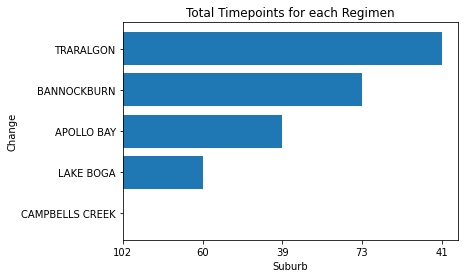

In [13]:
y_axis = top_five["change 2009 to 2019"]
x_axis = top_five["Suburb"]

x_data = np.arange(0, len(x_axis))
tick_locations = []

for x in x_data:
    tick_locations.append(x)

plt.barh(x_data, y_axis, alpha=1, align='center')
plt.yticks(tick_locations, x_axis,  rotation='horizontal')

plt.title("Total Timepoints for each Regimen")
plt.xlabel("Suburb")
plt.ylabel("Change")

In [420]:
clean_subs_df = clean_subs_df.sort_values("change 2009 to 2019", ascending=False)
clean_subs_df

,Suburb,2018,2019,2020,change 2018 to 2019,change 2009 to 2019,Growth PA
646,SMYTHESDALE,290000.0,340000.0,121000.0,17.0,167.0,10.3
722,TRENTHAM,603000.0,614000.0,632500.0,2.0,159.0,10
274,FLINDERS,1697500.0,1670000.0,1300000.0,-2.0,155.0,9.8
183,COONGULLA,242000.0,335000.0,310000.0,38.0,139.0,9.1
573,POOWONG,315000.0,443000.0,285000.0,41.0,138.0,9
...,...,...,...,...,...,...,...
155,CHILTERN,260000.0,223500.0,265000.0,-14.0,-2.0,-0.2
72,BEULAH,120500.0,77000.0,81000.0,-36.0,-4.0,-0.4
542,NYAH WEST,135000.0,85000.0,110000.0,-37.0,-4.0,-0.5
555,OUYEN,93000.0,99000.0,114000.0,6.0,-10.0,-1


In [421]:
clean_subs_df = clean_subs_df.sort_values("change 2018 to 2019", ascending=True)
clean_subs_df

,Suburb,2018,2019,2020,change 2018 to 2019,change 2009 to 2019,Growth PA
560,PARKVILLE,2430000.0,1480000.0,1657500.0,-39.0,14.0,1.3
542,NYAH WEST,135000.0,85000.0,110000.0,-37.0,-4.0,-0.5
72,BEULAH,120500.0,77000.0,81000.0,-36.0,-4.0,-0.4
276,FLOWERDALE,390000.0,290000.0,420000.0,-26.0,24.0,2.1
582,PORTLAND NORTH,367500.0,276000.0,541000.0,-25.0,23.0,2.1
...,...,...,...,...,...,...,...
573,POOWONG,315000.0,443000.0,285000.0,41.0,138.0,9
187,CORRYONG,162500.0,236000.0,200000.0,45.0,66.0,5.2
735,WAHGUNYAH,240000.0,355000.0,395000.0,48.0,87.0,6.5
790,WYE RIVER,870000.0,1300000.0,1042500.0,49.0,105.0,7.4


Text(0, 0.5, 'Timepoints')

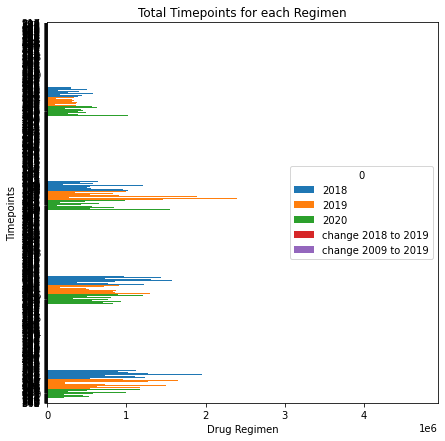

In [422]:
#Creating Chart
clean_subs_df.plot(kind="barh", figsize=(7,7))

#set chart title
plt.title("Total Timepoints for each Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints")

,Suburb,2018,2019,2020,change 2018 to 2019,change 2009 to 2019,Growth PA
338,HOPETOUN,86000.0,66000.0,142500.0,-23.0,-10.0,-1.1
555,OUYEN,93000.0,99000.0,114000.0,6.0,-10.0,-1
542,NYAH WEST,135000.0,85000.0,110000.0,-37.0,-4.0,-0.5
72,BEULAH,120500.0,77000.0,81000.0,-36.0,-4.0,-0.4
155,CHILTERN,260000.0,223500.0,265000.0,-14.0,-2.0,-0.2
...,...,...,...,...,...,...,...
269,FINGAL,1350000.0,1240000.0,1415000.0,-8.0,138.0,9.1
183,COONGULLA,242000.0,335000.0,310000.0,38.0,139.0,9.1
274,FLINDERS,1697500.0,1670000.0,1300000.0,-2.0,155.0,9.8
722,TRENTHAM,603000.0,614000.0,632500.0,2.0,159.0,10
